# Buzz in social media

In [2]:
with open("Twitter.names") as f:
    print(f.read())

1. Title of Database: Buzz prediction on Twitter


2. Sources:
   -- Creators : 
        François Kawala (1,2) and 
        Ahlame Douzal (1) and 
        Eric Gaussier (1) and
        Eustache Diemert (2)

   -- Institutions : 
        (1) Université Joseph Fourier (Grenoble I)
            Laboratoire d'informatique de Grenoble (LIG)
        (2) BestofMedia Group

   -- Donor: BestofMedia (ediemert@bestofmedia.com)
   -- Date: May, 2013


3. Past Usage:
   -- References : 
        Predicting Buzz Magnitude in Social Media (in submission (ECML-PKDD 13))

   -- Predicted attribute : 
         Mean Number of active discussion (NAD). This attribute is a positive integer 
         that describe the popularity of the instance's topic. It is stored is 
         the rightmost column.

   -- Study results : 
        The results achieved are acceptable, nevertheless the unbalanced nature
        of this dataset leaves some room for improvement. The data may be scaled
        and normalized. Fir

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [5]:
colnames = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6',
            'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6',
            'AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6',
            'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6',
            'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6',
            'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6',
            'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6',
            'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6',
            'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6',
            'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6',
            'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6', 'MNAD']
twitter_dt = pd.read_csv('Twitter.data', names=colnames)


In [6]:
twitter_dt

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,AI_3,AI_4,AI_5,AI_6,AS(NA)_0,AS(NA)_1,AS(NA)_2,AS(NA)_3,AS(NA)_4,AS(NA)_5,AS(NA)_6,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,NAC_0,NAC_1,NAC_2,NAC_3,NAC_4,NAC_5,NAC_6,AS(NAC)_0,AS(NAC)_1,AS(NAC)_2,AS(NAC)_3,AS(NAC)_4,AS(NAC)_5,AS(NAC)_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NA_0,NA_1,NA_2,NA_3,NA_4,NA_5,NA_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,MNAD
0,0,2,0,0,1,1,1,0,1,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000004,0.000004,0.000004,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000003,0.000000,0.000000,0.000002,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
1,2,1,0,0,0,0,4,2,1,0,0,0,0,4,0.000007,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.000003,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.5
2,1,0,0,0,0,4,1,1,0,0,0,0,4,1,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,0.000002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
3,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0.000003,0.000000,0.000000,0.000003,0.000000,0.000000,0.000001,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000002,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.5
4,0,1,0,0,1,2,3,0,1,0,0,1,2,3,0.000000,0.000003,0.000000,0.000000,0.000001,0.000002,0.000003,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,0.000000,0.000001,0.000000,0.000000,0.000000,0.000001,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0,6,0,0,1,3,3,0,3,0,0,1,2,0,0.000000,0.000005,0.000000,0.000000,0.000001,0.000003,0.000003,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,3.0,3.0,0.000000,0.000003,0.000000,0.000000,0.000001,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,3.0,3.0,1.5
10749,0,1,3,3,0,3,6,0,1,2,0,0,1,5,0.000000,0.000001,0.000003,0.000003,0.000000,0.000002,0.000006,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,3.0,6.0,0.000000,0.000001,0.000002,0.000002,0.000000,0.000002,0.000003,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,2.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,3.0,6.0,7.5
10750,1,3,3,0,3,6,15,1,2,0,0,1,5,0,0.000001,0.000003,0.000003,0.000000,0.000002,0.000006,0.000005,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,3.0,6.0,15.0,0.000001,0.000002,0.000002,0.000000,0.000002,0.000003,0.000007,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,2.0,5.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,3.0,6.0,15.0,0.0
10751,3,3,0,3,6,15,0,2,0,0,1,5,0,0,0.000003,0.000003,0.000000,0.000002,0.000006,0.000005,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,3.0,6.0,15.0,0.0,0.000002,0.000002,0.000000,0.000002,0.000003,0.000007,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,2.0,5.0,4.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0

В датасете нет пропущенных значений, поэтому не надо его очищать

In [7]:
twitter_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10753 entries, 0 to 10752
Data columns (total 78 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NCD_0      10753 non-null  int64  
 1   NCD_1      10753 non-null  int64  
 2   NCD_2      10753 non-null  int64  
 3   NCD_3      10753 non-null  int64  
 4   NCD_4      10753 non-null  int64  
 5   NCD_5      10753 non-null  int64  
 6   NCD_6      10753 non-null  int64  
 7   AI_0       10753 non-null  int64  
 8   AI_1       10753 non-null  int64  
 9   AI_2       10753 non-null  int64  
 10  AI_3       10753 non-null  int64  
 11  AI_4       10753 non-null  int64  
 12  AI_5       10753 non-null  int64  
 13  AI_6       10753 non-null  int64  
 14  AS(NA)_0   10753 non-null  float64
 15  AS(NA)_1   10753 non-null  float64
 16  AS(NA)_2   10753 non-null  float64
 17  AS(NA)_3   10753 non-null  float64
 18  AS(NA)_4   10753 non-null  float64
 19  AS(NA)_5   10753 non-null  float64
 20  AS(NA)

In [8]:
y = twitter_dt['MNAD']
X = twitter_dt.drop(columns=['MNAD'])

In [9]:
corr_matrix = X.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,AI_3,AI_4,AI_5,AI_6,AS(NA)_0,AS(NA)_1,AS(NA)_2,AS(NA)_3,AS(NA)_4,AS(NA)_5,AS(NA)_6,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,NAC_0,NAC_1,NAC_2,NAC_3,NAC_4,NAC_5,NAC_6,AS(NAC)_0,AS(NAC)_1,AS(NAC)_2,AS(NAC)_3,AS(NAC)_4,AS(NAC)_5,AS(NAC)_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NA_0,NA_1,NA_2,NA_3,NA_4,NA_5,NA_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
NCD_0,1.00,0.91,0.88,0.88,0.90,0.89,0.88,0.97,0.86,0.81,0.82,0.84,0.82,0.80,0.91,0.85,0.84,0.86,0.89,0.87,0.85,0.06,0.05,0.06,0.06,0.06,0.05,0.05,1.00,0.92,0.88,0.88,0.91,0.90,0.89,0.90,0.84,0.85,0.87,0.89,0.88,0.86,0.06,0.05,0.06,0.05,0.06,0.04,0.05,0.01,0.01,0.04,0.02,0.01,0.00,0.01,1.00,0.91,0.87,0.87,0.91,0.90,0.88,0.00,0.00,0.01,0.00,0.00,-0.01,-0.00,1.00,0.91,0.88,0.88,0.90,0.89,0.88
NCD_1,0.91,1.00,0.90,0.88,0.91,0.91,0.89,0.89,0.97,0.86,0.84,0.86,0.86,0.82,0.85,0.91,0.84,0.84,0.87,0.88,0.85,0.06,0.07,0.06,0.05,0.06,0.04,0.05,0.91,1.00,0.90,0.88,0.91,0.92,0.89,0.85,0.89,0.83,0.85,0.87,0.88,0.85,0.06,0.06,0.06,0.05,0.06,0.04,0.05,0.01,0.01,0.03,0.02,0.01,0.00,0.01,0.90,1.00,0.89,0.88,0.91,0.92,0.88,0.00,0.00,0.01,0.00,0.00,-0.01,-0.00,0.91,1.00,0.90,0.88,0.91,0.92,0.89
NCD_2,0.88,0.90,1.00,0.93,0.92,0.92,0.90,0.85,0.87,0.96,0.89,0.88,0.87,0.85,0.84,0.82,0.91,0.87,0.87,0.87,0.86,0.06,0.05,0.08,0.06,0.06,0.05,0.05,0.87,0.89,1.00,0.92,0.92,0.92,0.91,0.85,0.82,0.90,0.87,0.87,0.87,0.86,0.06,0.05,0.07,0.06,0.06,0.04,0.05,0.01,0.01,0.04,0.02,0.01,0.00,0.01,0.86,0.89,0.99,0.92,0.92,0.91,0.90,0.00,0.00,0.01,0.00,0.00,-0.01,-0.00,0.87,0.90,1.00,0.93,0.92,0.92,0.90
NCD_3,0.88,0.88,0.93,1.00,0.95,0.93,0.91,0.85,0.86,0.89,0.97,0.91,0.89,0.85,0.85,0.83,0.84,0.93,0.88,0.87,0.85,0.06,0.05,0.06,0.07,0.06,0.05,0.05,0.87,0.88,0.92,1.00,0.95,0.93,0.91,0.85,0.82,0.84,0.93,0.88,0.87,0.85,0.06,0.05,0.06,0.07,0.06,0.04,0.05,0.01,0.01,0.03,0.02,0.01,0.00,0.01,0.87,0.88,0.92,0.99,0.94,0.93,0.91,0.00,0.00,0.01,0.00,0.00,-0.01,-0.00,0.88,0.88,0.93,1.00,0.95,0.93,0.91
NCD_4,0.90,0.91,0.92,0.95,1.00,0.97,0.94,0.88,0.87,0.88,0.91,0.97,0.92,0.89,0.90,0.88,0.88,0.91,0.94,0.91,0.90,0.07,0.05,0.07,0.06,0.06,0.05,0.05,0.90,0.90,0.92,0.95,1.00,0.97,0.95,0.90,0.87,0.88,0.91,0.94,0.91,0.90,0.06,0.05,0.07,0.06,0.06,0.05,0.05,0.01,0.01,0.04,0.02,0.01,0.00,0.01,0.90,0.90,0.92,0.94,0.99,0.96,0.94,0.00,0.00,0.01,0.00,-0.00,-0.01,-0.00,0.90,0.91,0.92,0.95,1.00,0.97,0.94
NCD_5,0.89,0.91,0.92,0.93,0.97,1.00,0.96,0.87,0.89,0.88,0.90,0.93,0.97,0.91,0.91,0.90,0.89,0.91,0.93,0.94,0.91,0.07,0.06,0.07,0.06,0.06,0.05,0.05,0.89,0.91,0.91,0.93,0.96,1.00,0.96,0.91,0.89,0.89,0.91,0.93,0.94,0.91,0.07,0.06,0.07,0.06,0.06,0.05,0.05,0.01,0.01,0.04,0.02,0.01,0.00,0.01,0.88,0.91,0.91,0.92,0.96,0.99,0.96,0.00,0.00,0.01,0.00,0.00,-0.01,-0.00,0.89,0.91,0.92,0.93,0.97,1.00,0.96
NCD_6,0.88,0.89,0.90,0.91,0.94,0.96,1.00,0.86,0.86,0.87,0.88,0.92,0.92,0.96,0.91,0.91,0.90,0.91,0.92,0.93,0.95,0.07,0.06,0.07,0.06,0.06,0.05,0.05,0.87,0.88,0.90,0.90,0.94,0.96,1.00,0.91,0.90,0.90,0.92,0.92,0.92,0.95,0.07,0.06,0.07,0.06,0.06,0.05,0.05,0.01,0.01,0.04,0.02,0.01,0.00,0.00,0.87,0.88,0.89,0.90,0.94,0.96,0.99,0.00,0.00,0.01,0.00,0.00,-0.01,-0.01,0.88,0.89,0.90,0.91,0.94,0.96,1.00
AI_0,0.97,0.89,0.85,0.85,0.88,0.87,0.86,1.00,0.89,0.84,0.84,0.86,0.84,0.82,0.90,0.84,0.83,0.85,0.87,0.86,0.84,0.07,0.05,0.07,0.06,0.07,0.05,0.05,0.96,0.89,0.85,0.85,0.88,0.88,0.87,0.88,0.82,0.83,0.85,0.86,0.85,0.84,0.07,0.05,0.07,0.06,0.06,0.05,0.05,0.01,0.01,0.04,0.03,0.02,0.01,0.01,0.98,0.90,0.86,0.86,0.89,0.89,0.87,0.00,0.00,0.01,0.00,0.00,-0.01,-0.00,0.97,0.89,0.85,0.85,0.88,0.87,0.86
AI_1,0.86,0.97,0.87,0.86,0.87,0.89,0.86,0.89,1.00,0.88,0.86,0.87,0.89,0.84,0.82,0.88,0.81,0.82,0.84,0.85,0.82,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.85,0.96,0.87,0.85,0.87,0.89,0.86,0.81,0.85,0.80,0.82,0.83,0.84,0.81,0.06,0.07,0.06,0.06,0.06,0.05,0.05,0.01,0.01,0.04,0.02,0.02,0.01,0.01,0.86,0.98,0.88,0.86,0.88,0.90,0.87,0.00,0.01,0.01,0.00,0.00,-0.01,-0.00,0.86,0.97,0.87,0.86,0.

(0.0, 50.0)

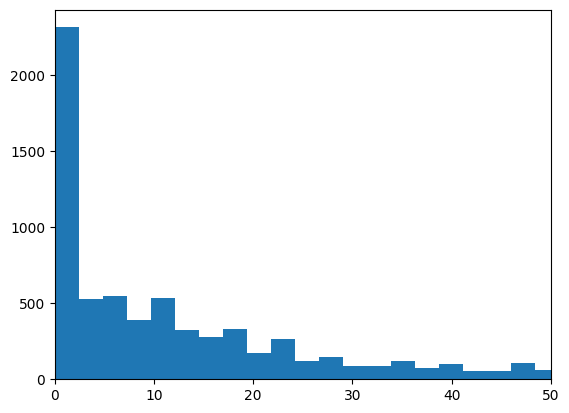

In [10]:
plt.hist(X['NCD_0'], bins=10000)
plt.xlim([0, 50])
# plt.xlim([0, 60000])

<Axes: >

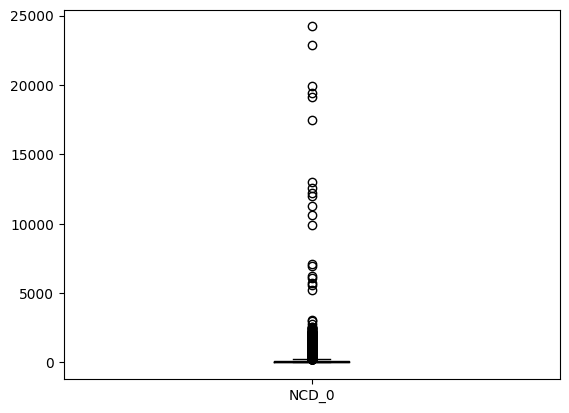

In [11]:
X.boxplot(column=['NCD_0'], grid= False , color='black')

Давайте уберем временные измерения в показателях, которые сильно скоррелированы по времени

In [20]:
df_timed = X[['BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6',
             'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6',
             'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6',
             'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6']]
df_timed['NCD'] = (X['NCD_0'] + X['NCD_1'] + X['NCD_2'] + X['NCD_3'] + X['NCD_4'] + X['NCD_5'] + X['NCD_6'])/7
df_timed['AI'] = (X['AI_0'] + X['AI_1'] + X['AI_2'] + X['AI_3'] + X['AI_4'] + X['AI_5'] + X['AI_6'])/7
df_timed['AS(NA)'] = (X['AS(NA)_0'] + X['AS(NA)_1'] + X['AS(NA)_2'] + X['AS(NA)_3'] + X['AS(NA)_4'] + X['AS(NA)_5'] + X['AS(NA)_6'])/7
df_timed['NAC'] = (X['NAC_0'] + X['NAC_1'] + X['NAC_2'] + X['NAC_3'] + X['NAC_4'] + X['NAC_5'] + X['NAC_6'])/7
df_timed['AS(NAC)'] = (X['AS(NAC)_0'] + X['AS(NAC)_1'] + X['AS(NAC)_2'] + X['AS(NAC)_3'] + X['AS(NAC)_4'] + X['AS(NAC)_5'] + X['AS(NAC)_6'])/7
df_timed['NA'] = (X['NA_0'] + X['NA_1'] + X['NA_2'] + X['NA_3'] + X['NA_4'] + X['NA_5'] + X['NA_6'])/7
df_timed['NAD'] = (X['NAD_0'] + X['NAD_1'] + X['NAD_2'] + X['NAD_3'] + X['NAD_4'] + X['NAD_5'] + X['NAD_6'])/7

<ipython-input-20-059fa787f894>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timed['NCD'] = (X['NCD_0'] + X['NCD_1'] + X['NCD_2'] + X['NCD_3'] + X['NCD_4'] + X['NCD_5'] + X['NCD_6'])/7
<ipython-input-20-059fa787f894>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timed['AI'] = (X['AI_0'] + X['AI_1'] + X['AI_2'] + X['AI_3'] + X['AI_4'] + X['AI_5'] + X['AI_6'])/7
<ipython-input-20-059fa787f894>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [16]:
corr_matrix = df_timed.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NCD,AI,AS(NA),NAC,AS(NAC),NA,NAD
BL_0,1.00,-0.07,0.37,0.35,0.34,0.24,0.28,0.99,-0.08,0.37,0.35,0.34,0.24,0.27,0.14,-0.06,0.22,0.15,0.11,0.06,0.07,0.10,-0.08,0.08,0.06,0.04,-0.00,0.02,0.07,0.07,0.07,0.07,0.07,0.07,0.07
BL_1,-0.07,1.00,0.38,0.33,0.30,0.25,0.22,-0.08,0.99,0.38,0.32,0.30,0.25,0.22,-0.05,0.17,0.24,0.14,0.08,0.06,0.07,-0.05,0.13,0.11,0.03,0.03,0.02,0.01,0.06,0.06,0.06,0.06,0.06,0.06,0.06
BL_2,0.37,0.38,1.00,0.43,0.41,0.31,0.30,0.37,0.38,0.99,0.43,0.41,0.32,0.30,0.05,0.05,0.65,0.22,0.13,0.08,0.10,0.03,0.04,0.31,0.09,0.05,0.01,0.05,0.07,0.08,0.08,0.07,0.08,0.07,0.07
BL_3,0.35,0.33,0.43,1.00,0.35,0.24,0.24,0.35,0.32,0.43,0.99,0.35,0.24,0.24,0.04,0.04,0.26,0.49,0.11,0.04,0.06,0.03,0.02,0.12,0.25,0.04,-0.02,0.00,0.06,0.07,0.07,0.06,0.07,0.06,0.06
BL_4,0.34,0.30,0.41,0.35,1.00,0.21,0.24,0.34,0.30,0.40,0.35,0.99,0.21,0.24,0.07,0.03,0.25,0.15,0.32,0.02,0.07,0.05,0.01,0.11,0.05,0.19,-0.01,0.02,0.06,0.07,0.07,0.06,0.07,0.06,0.06
BL_5,0.24,0.25,0.31,0.24,0.21,1.00,-0.03,0.23,0.25,0.31,0.24,0.21,0.99,-0.03,0.05,0.05,0.20,0.10,0.06,0.32,-0.02,0.03,0.04,0.09,0.04,0.03,0.15,-0.03,0.05,0.05,0.05,0.05,0.05,0.05,0.05
BL_6,0.28,0.22,0.30,0.24,0.24,-0.03,1.00,0.27,0.22,0.30,0.24,0.24,-0.03,0.99,0.05,0.05,0.17,0.09,0.06,-0.06,0.31,0.03,0.02,0.05,0.02,0.02,-0.05,0.16,0.05,0.06,0.06,0.05,0.06,0.05,0.05
CS_0,0.99,-0.08,0.37,0.35,0.34,0.23,0.27,1.00,-0.08,0.37,0.35,0.34,0.24,0.27,0.20,-0.05,0.23,0.16,0.12,0.06,0.07,0.18,-0.07,0.10,0.07,0.06,0.00,0.02,0.07,0.07,0.07,0.07,0.07,0.06,0.07
CS_1,-0.08,0.99,0.38,0.32,0.30,0.25,0.22,-0.08,1.00,0.38,0.32,0.30,0.25,0.22,-0.04,0.22,0.25,0.15,0.08,0.07,0.07,-0.04,0.19,0.13,0.05,0.04,0.03,0.02,0.06,0.06,0.06,0.06,0.06,0.05,0.06
CS_2,0.37,0.38,0.99,0.43,0.40,0.31,0.30,0.37,0.38,1.00,0.43,0.41,0.32,0.30,0.05,0.06,0.68,0.23,0.14,0.09,0.10,0.04,0.04,0.36,0.10,0.07,0.02,0.05,0.07,0.07,0.07,0.07,0.07,0.07,0.07


Видно, что все саггрегированные **очень сильно** скоррелированы друг с другом, так же очень сильно скоррелированы $DL_i$ и $CS_i$

Оставим только 1 переменную

In [21]:
df_timed = df_timed.drop(columns=['BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6'])
df_timed['last'] = (df_timed['NCD'] +	df_timed['AI'] +	df_timed['AS(NA)'] +	df_timed['NAC']	+ df_timed['AS(NAC)']	+ df_timed['NA'] +	df_timed['NAD'])/7
df_timed = df_timed.drop(columns=['NCD', 'AI', 'AS(NA)', 'NAC', 'AS(NAC)', 'NA', 'NAD'])

In [22]:
corr_matrix = df_timed.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,last
CS_0,1.00,-0.08,0.37,0.35,0.34,0.24,0.27,0.20,-0.05,0.23,0.16,0.12,0.06,0.07,0.18,-0.07,0.10,0.07,0.06,0.00,0.02,0.07
CS_1,-0.08,1.00,0.38,0.32,0.30,0.25,0.22,-0.04,0.22,0.25,0.15,0.08,0.07,0.07,-0.04,0.19,0.13,0.05,0.04,0.03,0.02,0.06
CS_2,0.37,0.38,1.00,0.43,0.41,0.32,0.30,0.05,0.06,0.68,0.23,0.14,0.09,0.10,0.04,0.04,0.36,0.10,0.07,0.02,0.05,0.07
CS_3,0.35,0.32,0.43,1.00,0.36,0.24,0.24,0.04,0.04,0.29,0.54,0.12,0.05,0.06,0.03,0.02,0.15,0.29,0.06,0.00,0.01,0.06
CS_4,0.34,0.30,0.41,0.36,1.00,0.21,0.24,0.07,0.03,0.26,0.18,0.38,0.05,0.08,0.05,0.02,0.14,0.08,0.26,0.01,0.04,0.06
CS_5,0.24,0.25,0.32,0.24,0.21,1.00,-0.03,0.05,0.06,0.21,0.12,0.09,0.36,-0.01,0.03,0.04,0.11,0.06,0.06,0.20,-0.01,0.05
CS_6,0.27,0.22,0.30,0.24,0.24,-0.03,1.00,0.05,0.05,0.18,0.10,0.07,-0.04,0.37,0.03,0.03,0.06,0.03,0.04,-0.02,0.22,0.05
AT_0,0.20,-0.04,0.05,0.04,0.07,0.05,0.05,1.00,-0.00,0.05,0.04,0.04,0.05,0.04,0.94,0.00,0.03,0.03,0.03,0.03,0.05,0.01
AT_1,-0.05,0.22,0.06,0.04,0.03,0.06,0.05,-0.00,1.00,0.08,0.03,0.02,0.03,0.05,0.01,0.93,0.06,0.02,0.02,0.03,0.04,0.01
AT_2,0.23,0.25,0.68,0.29,0.26,0.21,0.18,0.05,0.08,1.00,0.44,0.20,0.17,0.11,0.06,0.09,0.71,0.28,0.15,0.11,0.08,0.04


Теперь почти все регрессоры не так сильно скоррелированы